In [34]:
#Setup

import numpy as np
import glob
import random
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import model_from_json


In [35]:
# Images path
images_path = glob.glob("D:\\NSU\\13th semester\\CSE 499A\\Workings\\Test_2\\Bounding Box\\Uploaded_ECG_Image/*.png")
images_path

['D:\\NSU\\13th semester\\CSE 499A\\Workings\\Test_2\\Bounding Box\\Uploaded_ECG_Image\\123asd.PNG']

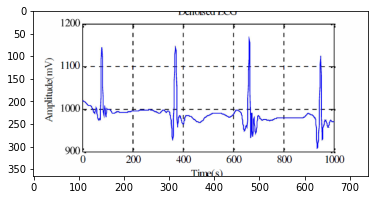

In [36]:
for img in images_path:
    pic = image.load_img(img)
    plt.imshow(pic)

In [37]:
# Name custom object
classes = ["beat"]

In [38]:
# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)

# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=1, fy=1)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            #cv2.putText(img, label, (x, y + 30), font, 3, color, 2)
            roi_color = img[y:y + h, x:x + w]
            print("[INFO] Object found. Saving locally.")
            cv2.imwrite("D:\\NSU\\13th semester\\CSE 499A\\Workings\\Test_2\\Bounding Box\\Image _for_Prediction\\" +str(w) + str(h) + "_beat.jpg", roi_color)


    cv2.imshow("Image", img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()

0
0
0
0
0
[[1]
 [2]
 [4]]
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.


In [39]:
test_img = glob.glob('Image _for_Prediction/*.jpg')
test_img

['Image _for_Prediction\\107172_beat.jpg',
 'Image _for_Prediction\\160220_beat.jpg',
 'Image _for_Prediction\\162198_beat.jpg']

In [40]:
model = model_from_json(open("D:\\NSU\\13th semester\\CSE 499A\\Workings\\Test_2\\Classifier\\Saved Model\\model_234x234.json", "r").read())
model.load_weights('D:\\NSU\\13th semester\\CSE 499A\\Workings\\Test_2\\Classifier\\Saved Model\\model_234x234.h5')

In [41]:
results = []
def make_perdiction_on_bb(img):
    test_image = image.load_img(img, target_size =(234,234))
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image) 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    beat = ['NOR', 'APC', 'FPNB', 'FVNB', 'LBB', 'PAB', 'PVC', 'RBB']
    result_in_number = [result[0][0],result[0][1],result[0][2],result[0][3],result[0][4],result[0][5],result[0][6],result[0][7]]
    results.append(result_in_number)
    ax.bar(beat,result_in_number)
    plt.show()

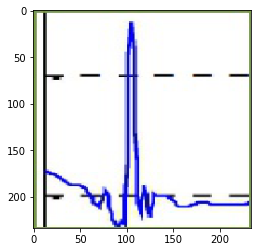

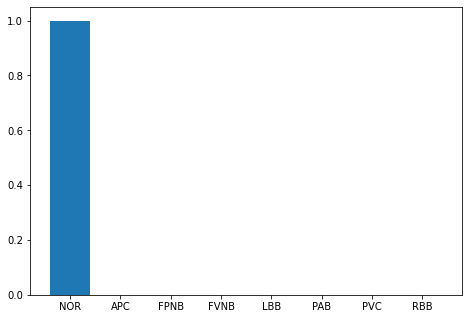

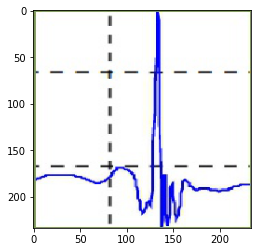

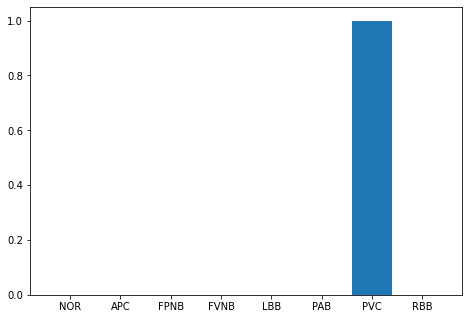

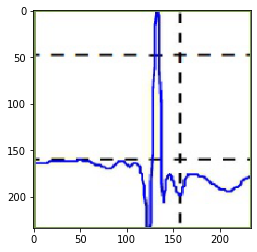

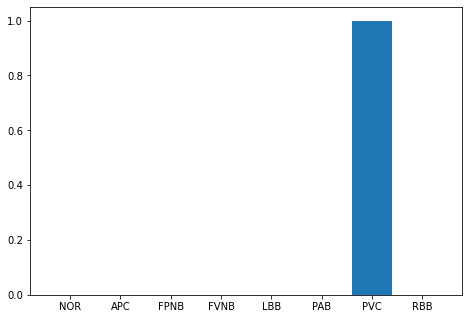

In [42]:
for img in test_img:
    make_perdiction_on_bb(img)

In [43]:
countN = 0
count = 0
for i in range(len(results)):
    if results[i][0] == 1.0:
        countN = countN + 1
    else:
        count = count +1
        
if count>countN:
    print('Arrhythmia Detected')
    
    

Arrhythmia Detected
